# Zastosowanie schematu Metropolisa: model Isinga 2D

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

In [ ]:
sns.set(font="Times New Roman")
sns.set_context("paper", font_scale=1.2)


In [ ]:
n = 7
J = 100 # meV
Bmi = 0.1 # meV
kT = 0.01 # meV
dim = 2**n

## Zadanie 1

In [ ]:
matrix = np.ones((2**n,2**n))

In [ ]:
def Energy():
  E1 = 0
  E2 = 0

  for i in range(0,dim):
    for j in range(0,dim):
     
      E1 += (matrix[i,j]*matrix[i,(j+1)%dim]+matrix[i,j]*matrix[(i-1)%dim,j]+matrix[i,j]*matrix[(i+1)%dim,j]+matrix[i,j]*matrix[i,(j-1)%dim])/2
      E2 += matrix[i,j]
  
  return (-J*E1-Bmi*E2)/(2**(2*n))

In [ ]:
test = Energy()

In [ ]:
test

-200.1

In [ ]:
def Metropolis():
  E = Energy()
  dE = 0
  Etab = []
  Mtab = []
  M = 0
  Stab = []
  newdim = int(dim/2)
  d = 2
  S = 0
  N = 10000000
  T = np.linspace(0.01,1000,50)
  for kT in T:
      Sigma1 = 0
      Sigma2 = 0
      SS = 0
      
      for i in range(0,N):

        x = random.randint(0,dim-1)
        y = random.randint(0,dim-1)

        dE = (2*Bmi*(matrix[x,y])+2*J*(matrix[x,y])*(matrix[(x+1)%dim,y]+matrix[x,(y-1)%dim]+matrix[x,(y+1)%dim]+matrix[(x-1)%dim,y]))

        Sigma1 += matrix[newdim,newdim]
        Sigma2 += matrix[newdim-d,newdim-d]
        SS += matrix[newdim,newdim]*matrix[newdim-d,newdim-d]

        if random.random()<np.exp(-dE/kT) or dE<0:
          E += dE
          matrix[x,y] = -matrix[x,y]
        

      Etab.append(E/(2**(2*n)))
      M = sum(sum(matrix))
      Mtab.append(M/(2**(2*n)))
      Stab.append(SS/N-Sigma1/N*Sigma2/N)
  return Etab,Mtab,Stab

In [ ]:
Etest,Mtest,Stest = Metropolis()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


In [ ]:
x = np.linspace(0.01,1000,50)

Text(0.5, 1.0, 'Zależność Energii na jon w funkcji kT')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


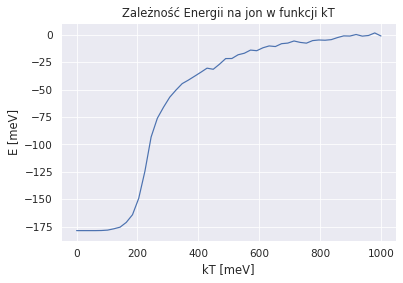

In [ ]:
plt.plot(x,Etest)
plt.xlabel("kT [meV]")
plt.ylabel("E [meV]")
plt.title("Zależność Energii na jon w funkcji kT")

Text(0.5, 1.0, 'Zależność magnetyzacji układu  w funkcji kT')

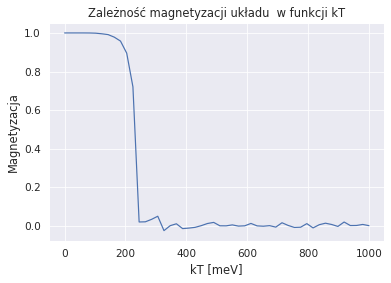

In [ ]:
plt.plot(x,Mtest)
plt.xlabel("kT [meV]")
plt.ylabel("Magnetyzacja")
plt.title("Zależność magnetyzacji układu  w funkcji kT")

In [ ]:
cv = np.gradient(Etest)

Text(0.5, 1.0, 'Zależność ciepła właściwego w funkcji kT')

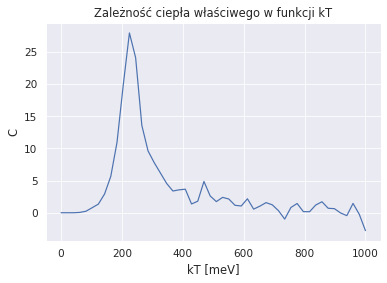

In [ ]:
plt.plot(x,cv)
plt.xlabel("kT [meV]")
plt.ylabel("C")
plt.title("Zależność ciepła właściwego w funkcji kT")

Text(0.5, 1.0, 'Korelacja spinu na środku ze spinem oddalonym o d = 2')

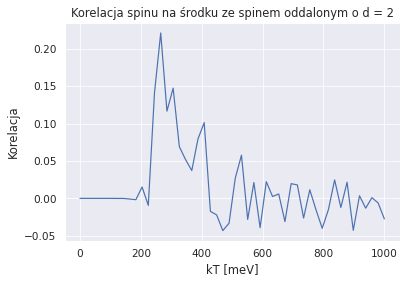

In [ ]:
plt.plot(x,Stest)
plt.xlabel("kT [meV]")
plt.ylabel("Korelacja")
plt.title("Korelacja spinu na środku ze spinem oddalonym o d = 2")

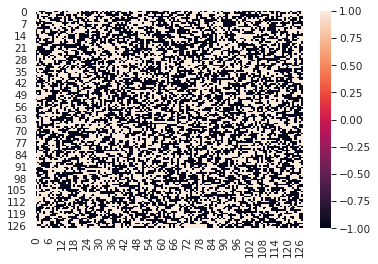

In [ ]:
sns.heatmap(matrix)